
STEP 1: Data Preparation
Samples: 253680
Features (with bias): 9

STEP 3: Training Started


STEP 2: Initializing ANN
Hidden neurons: 4
Output neurons: 1
Epoch   0 | Loss: 0.1461 | Accuracy: 42.18%
Epoch  50 | Loss: 0.0609 | Accuracy: 86.07%
Epoch 100 | Loss: 0.0578 | Accuracy: 86.07%
Epoch 150 | Loss: 0.0564 | Accuracy: 86.07%
Epoch 200 | Loss: 0.0555 | Accuracy: 86.07%
Epoch 250 | Loss: 0.0549 | Accuracy: 86.07%
Epoch 300 | Loss: 0.0544 | Accuracy: 86.07%

STEP 4: Training Completed


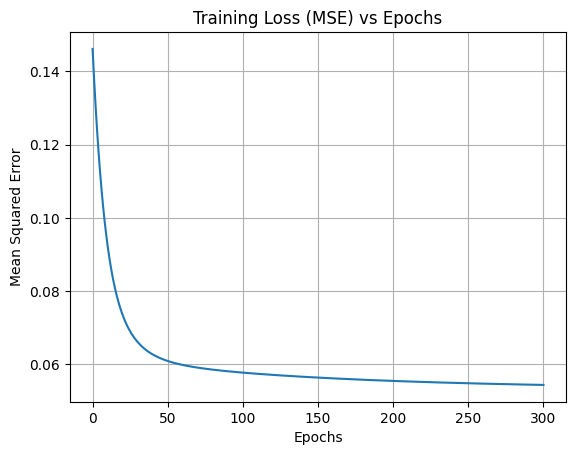

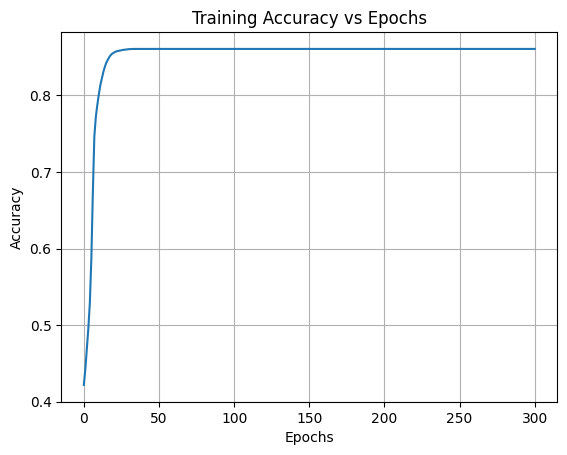


Final Training Accuracy: 86.07%


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# =============================================================================
# STEP 1: LOAD AND PREPARE DATA
# =============================================================================
print("\nSTEP 1: Data Preparation")

df = pd.read_csv("diabetes.csv")

features = [
    'HighBP', 'HighChol', 'BMI', 'Smoker',
    'Stroke', 'HeartDiseaseorAttack',
    'PhysActivity', 'Age'
]

X = df[features].values
y = df['Diabetes_binary'].values.reshape(-1, 1)

# Standardization
mean_X = np.mean(X, axis=0)
std_X = np.std(X, axis=0) + 1e-8
X = (X - mean_X) / std_X

# Add bias unit (x0 = 1)
m = X.shape[0]
bias_column = np.ones((m, 1))
X = np.hstack([bias_column, X])

print(f"Samples: {X.shape[0]}")
print(f"Features (with bias): {X.shape[1]}")

# =============================================================================
# STEP 2: ANN CLASS
# =============================================================================
class SimpleANN:

    def __init__(self, input_size, hidden_size):
        np.random.seed(1)

        print("\nSTEP 2: Initializing ANN")

        self.W1 = np.random.randn(input_size, hidden_size)
        self.W2 = np.random.randn(hidden_size + 1, 1)

        print(f"Hidden neurons: {hidden_size}")
        print("Output neurons: 1")

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, a):
        return a * (1 - a)

    # -------------------------------------------------------------------------
    # FORWARD PASS
    # -------------------------------------------------------------------------
    def forward(self, X):

        self.z1 = np.dot(X, self.W1)
        self.a1 = self.sigmoid(self.z1)

        bias_hidden = np.ones((X.shape[0], 1))
        self.a1b = np.hstack([bias_hidden, self.a1])

        self.z2 = np.dot(self.a1b, self.W2)
        self.y_hat = self.sigmoid(self.z2)

        return self.y_hat

    # -------------------------------------------------------------------------
    # BACKPROPAGATION
    # -------------------------------------------------------------------------
    def backward(self, X, y, lr):

        m = X.shape[0]

        delta_out = self.y_hat - y
        dW2 = np.dot(self.a1b.T, delta_out) / m

        delta_hidden = (
            np.dot(delta_out, self.W2[1:].T)
            * self.sigmoid_derivative(self.a1)
        )

        dW1 = np.dot(X.T, delta_hidden) / m

        self.W2 -= lr * dW2
        self.W1 -= lr * dW1

        return np.mean(0.5 * delta_out ** 2)

# =====================================================================s========
# STEP 3: TRAINING
# =============================================================================
print("\nSTEP 3: Training Started\n")

ann = SimpleANN(input_size=X.shape[1], hidden_size=4)

epochs = 300
learning_rate = 0.1

loss_history = []
accuracy_history = []

for epoch in range(epochs+1):

    y_hat = ann.forward(X)
    loss = ann.backward(X, y, learning_rate)
    loss_history.append(loss)

    # Accuracy calculation
    y_pred = (y_hat >= 0.5).astype(int)
    accuracy = np.mean(y_pred == y)
    accuracy_history.append(accuracy)

    if epoch % 50 == 0:
        print(
            f"Epoch {epoch:3d} | "
            f"Loss: {loss:.4f} | "
            f"Accuracy: {accuracy * 100:.2f}%"
        )

# =============================================================================
# STEP 4: VISUALIZATION
# =============================================================================
print("\nSTEP 4: Training Completed")

# Loss Curve
plt.figure()
plt.plot(loss_history)
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Training Loss (MSE) vs Epochs")
plt.grid(True)
plt.show()

# Accuracy Curve
plt.figure()
plt.plot(accuracy_history)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Epochs")
plt.grid(True)
plt.show()

print(f"\nFinal Training Accuracy: {accuracy_history[-1] * 100:.2f}%")



STEP 1: Data Preparation
Samples: 253680
Features (with bias): 9

STEP 3: Training Started


STEP 2: Initializing ANN
Hidden neurons: 4
Output neurons: 1
Epoch   0 | Loss: 0.0080 | Accuracy: 42.18%
Epoch  50 | Loss: 0.0026 | Accuracy: 85.81%
Epoch 100 | Loss: 0.0016 | Accuracy: 86.07%
Epoch 150 | Loss: 0.0013 | Accuracy: 86.07%
Epoch 200 | Loss: 0.0012 | Accuracy: 86.07%
Epoch 250 | Loss: 0.0012 | Accuracy: 86.07%
Epoch 300 | Loss: 0.0012 | Accuracy: 86.07%

STEP 4: Training Completed


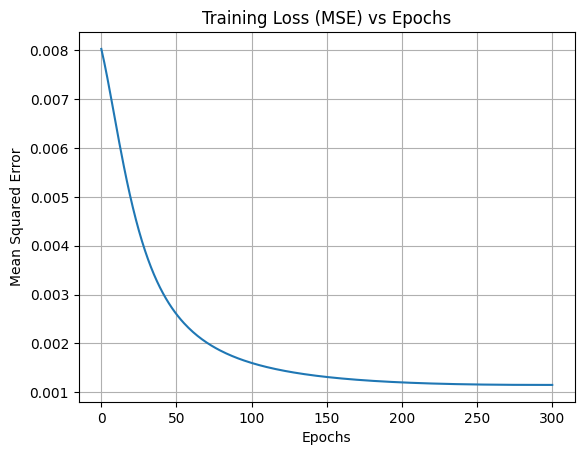

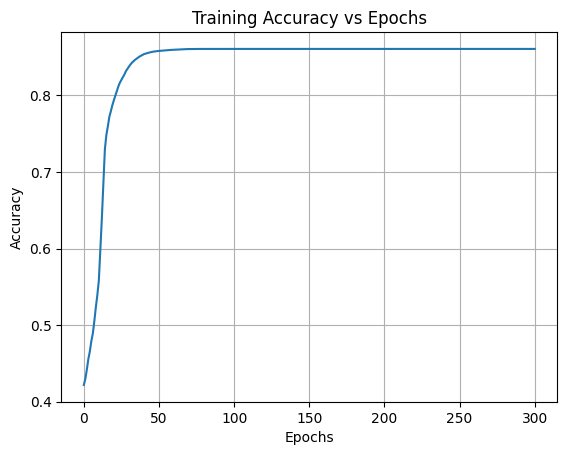


Final Training Accuracy: 86.07%


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# =============================================================================
# STEP 1: LOAD AND PREPARE DATA
# =============================================================================
print("\nSTEP 1: Data Preparation")

df = pd.read_csv("diabetes.csv")

features = [
    'HighBP', 'HighChol', 'BMI', 'Smoker',
    'Stroke', 'HeartDiseaseorAttack',
    'PhysActivity', 'Age'
]

X = df[features].values
y = df['Diabetes_binary'].values.reshape(-1, 1)

# Standardization
mean_X = np.mean(X, axis=0)
std_X = np.std(X, axis=0) + 1e-8
X = (X - mean_X) / std_X

# Add bias unit (x0 = 1)
m = X.shape[0]
bias_column = np.ones((m, 1))
X = np.hstack([bias_column, X])

print(f"Samples: {X.shape[0]}")
print(f"Features (with bias): {X.shape[1]}")

# =============================================================================
# STEP 2: ANN CLASS
# =============================================================================
class SimpleANN:

    def __init__(self, input_size, hidden_size):
        np.random.seed(1)

        print("\nSTEP 2: Initializing ANN")

        self.W1 = np.random.randn(input_size, hidden_size)
        self.W2 = np.random.randn(hidden_size + 1, 1)

        print(f"Hidden neurons: {hidden_size}")
        print("Output neurons: 1")

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, a):
        return a * (1 - a)

    # -------------------------------------------------------------------------
    # FORWARD PASS
    # -------------------------------------------------------------------------
    def forward(self, X):

        self.z1 = np.dot(X, self.W1)
        self.a1 = self.sigmoid(self.z1)

        bias_hidden = np.ones((X.shape[0], 1))
        self.a1b = np.hstack([bias_hidden, self.a1])

        #self.a1b = np.hstack([np.ones((X.shape[0], 1)), self.a1])

        self.z2 = np.dot(self.a1b, self.W2)
        self.y_hat = self.sigmoid(self.z2)

        return self.y_hat

    # -------------------------------------------------------------------------
    # BACKPROPAGATION
    # -------------------------------------------------------------------------
    def backward(self, X, y, lr):

        m = X.shape[0]

        delta_out = (self.y_hat - y) * self.sigmoid_derivative(self.y_hat)
        dW2 = np.dot(self.a1b.T, delta_out) / m

        delta_hidden = (
            np.dot(delta_out, self.W2[1:].T)
            * self.sigmoid_derivative(self.a1)
        )

        dW1 = np.dot(X.T, delta_hidden) / m

        self.W2 -= lr * dW2
        self.W1 -= lr * dW1

        return np.mean(0.5 * delta_out ** 2)

# =====================================================================s========
# STEP 3: TRAINING
# =============================================================================
print("\nSTEP 3: Training Started\n")

ann = SimpleANN(input_size=X.shape[1], hidden_size=4)

epochs = 300
learning_rate = 0.2

loss_history = []
accuracy_history = []

for epoch in range(epochs+1):

    y_hat = ann.forward(X)
    loss = ann.backward(X, y, learning_rate)
    loss_history.append(loss)

    # Accuracy calculation
    y_pred = (y_hat >= 0.5).astype(int)
    accuracy = np.mean(y_pred == y)
    accuracy_history.append(accuracy)

    if epoch % 50 == 0:
        print(
            f"Epoch {epoch:3d} | "
            f"Loss: {loss:.4f} | "
            f"Accuracy: {accuracy * 100:.2f}%"
        )

# =============================================================================
# STEP 4: VISUALIZATION
# =============================================================================
print("\nSTEP 4: Training Completed")

# Loss Curve
plt.figure()
plt.plot(loss_history)
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Training Loss (MSE) vs Epochs")
plt.grid(True)
plt.show()

# Accuracy Curve
plt.figure()
plt.plot(accuracy_history)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Epochs")
plt.grid(True)
plt.show()

print(f"\nFinal Training Accuracy: {accuracy_history[-1] * 100:.2f}%")
